## Considering data as data vs time and using prophet library to forecast which shown good results

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd

In [12]:
dates_2023 = pd.date_range(start='2023-01-01', end='2023-12-31')

In [17]:
import pandas as pd
from prophet import Prophet

# Read in the air quality data
data = pd.read_csv('/content/sample_data/NASSCOM_Data/Karimnagar.csv')

# Convert the date column to a datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Rename the columns to ds and y for Prophet input
data = data.rename(columns={'Date': 'ds', 'Temp': 'y'})

# Create a Prophet model and fit the data
model = Prophet()
model.fit(data)

# Create a future dataframe for the date you want to forecast
future = pd.DataFrame({'ds': dates_2023})

# Use the model to make a forecast for the future date
forecast = model.predict(future)

# Print the forecasted air quality index for the future date
print(forecast['yhat'])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4synri7l/kgjzerip.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4synri7l/07yxzc1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11203', 'data', 'file=/tmp/tmp4synri7l/kgjzerip.json', 'init=/tmp/tmp4synri7l/07yxzc1v.json', 'output', 'file=/tmp/tmp4synri7l/prophet_modelxmt9c97l/prophet_model-20230304085212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:52:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:52:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0      29.925270
1      29.643487
2      29.579129
3      29.855708
4      29.492089
         ...    
360    30.623583
361    30.234353
362    30.121772
363    30.008577
364    30.147126
Name: yhat, Length: 365, dtype: float64


<AxesSubplot:>

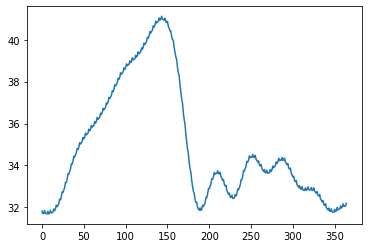

In [16]:
forecast['yhat'].plot()